In [3]:
%matplotlib inline

import os

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

from becmodel import BECModel

# load and process default (test) data
BM = BECModel()
BM.validate()
BM.data.keys()

2019-05-09 18:30:26,494 becmodel.main INFO     Initializing BEC model v0.0.3dev


dict_keys(['elevation', 'becmaster', 'rulepolys'])

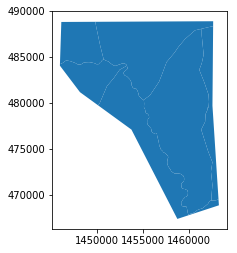

In [4]:
# view rules polygons
BM.data["rulepolys"].plot()

In [5]:
# view elevation table
BM.data["elevation"].head()

,becvalue,beclabel,class_name,cool_low,cool_high,neutral_low,neutral_high,warm_low,warm_high,zone,subzone,variant,phase,polygon_number
0,9,MS xk 1,Upper,1400,10000,1425,10000,1450,10000,MS,xk,1.0,NaN,301
1,4,IDF xh 1,Moderate,875,1400,925,1425,950,1450,IDF,xh,1.0,NaN,301
2,5,PP xh 1,Low,525,875,525,925,525,950,PP,xh,1.0,NaN,301
3,1,BG xh 1,Bottom,0,525,0,525,0,525,BG,xh,1.0,NaN,301
4,2,ESSFxcp,parkland,2100,10000,2100,10000,2125,10000,ESSF,xcp,NaN,NaN,302


In [6]:
# view becmaster
BM.data["becmaster"].head()

,becvalue,beclabel,zone,subzone,variant,phase
0,1,BG xh 1,BG,xh,1,NaN
1,2,ESSFxcp,ESSF,xcp,NaN,NaN
2,3,IDF dk 1,IDF,dk,1,NaN
3,4,IDF xh 1,IDF,xh,1,NaN
4,5,PP xh 1,PP,xh,1,NaN


In [7]:
# run the model 
# (get DEM, process, generate outputs in memory)
BM.run()

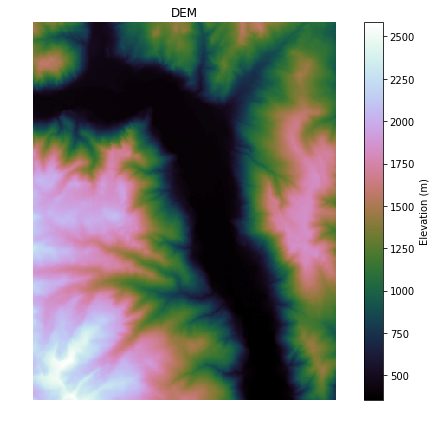

In [8]:
# view DEM
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.imshow(BM.data["dem"], cmap='cubehelix', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.title('DEM')
plt.axis('off')
plt.tight_layout()

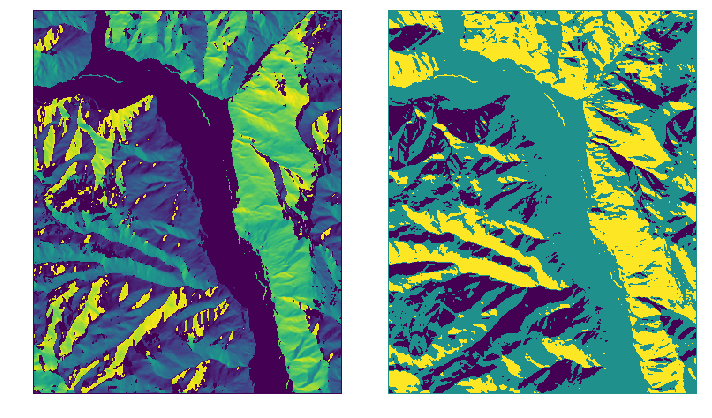

In [9]:
# view aspect, aspect class
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(BM.data["aspect"])
ax[1].imshow(BM.data["aspect_class"])
ax[0].axis('off')
ax[1].axis('off')

fig.tight_layout()
plt.show()

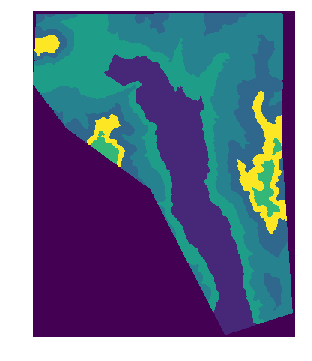

In [10]:
# plot output raster
fig, ax = plt.subplots(figsize=(8,6))
plt.axis('off')
plt.imshow(BM.data["becvalue_cleaned"])

2019-05-09 18:30:49,906 becmodel.main INFO     Output becmodel_tempdata/becmodel.gpkg created
2019-05-09 18:30:49,906 becmodel.main INFO     Output becmodel_tempdata/becmodel.gpkg created


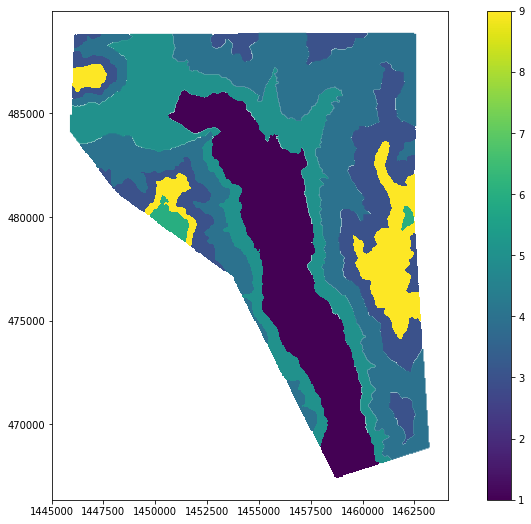

In [11]:
# write output and load from disk
BM.write()

gdf = gpd.read_file(
    os.path.join(BM.config["wksp"], BM.config["out_file"]), 
    layer=BM.config["out_layer"]
)

# don't show 0 values
gdf = gdf[gdf.becvalue > 0]

# plot
fig, ax = plt.subplots(figsize = (14,9))
gdf.plot(
    column='becvalue', 
    cmap='viridis', 
    ax=ax, 
    legend=True
)

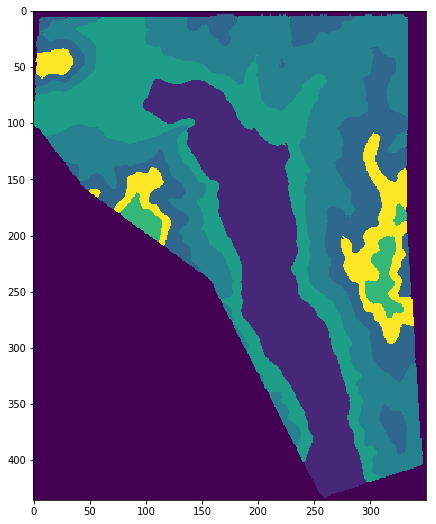

In [12]:
# what does processing at 25m, with a smaller noise_removal_threshold look like?
BM.update_config(
    {
        "cell_size": 25,
        "noise_removal_threshold": 10000
    }
)
BM.run()
fig, ax = plt.subplots(figsize=(14,9))
plt.imshow(BM.data["becvalue_cleaned"])